In [3]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [37]:
data = []
labels = []
height = 30
width = 30
channels = 3
num_classes = 43


for i in range(43) :
    path = "Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
    

Train/0/
Train/1/
Train/2/
Train/3/
Train/4/
Train/5/
Train/6/
Train/7/
Train/8/
Train/9/
Train/10/
Train/11/
Train/12/
Train/13/
Train/14/
Train/15/
Train/16/
Train/17/
Train/18/
Train/19/
Train/20/
Train/21/
Train/22/
Train/23/
Train/24/
Train/25/
Train/26/
Train/27/
Train/28/
Train/29/
Train/30/
Train/31/
Train/32/
Train/33/
Train/34/
Train/35/
Train/36/
Train/37/
Train/38/
Train/39/
Train/40/
Train/41/
Train/42/


In [38]:
x_train = np.array(data)
x_train = x_train/255.0
y_train = np.array(labels)
y_train = keras.utils.to_categorical(y_train,43)

In [39]:
# Spli|t Data
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)
print("Train :", X_train.shape)
print("Test :", X_test.shape)

Train : (27416, 30, 30, 3)
Test : (11751, 30, 30, 3)


Train images


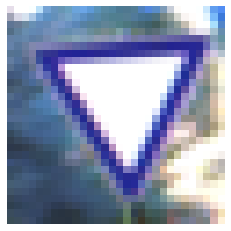

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


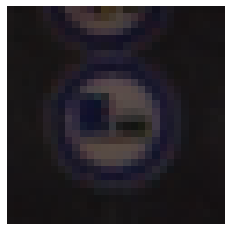

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


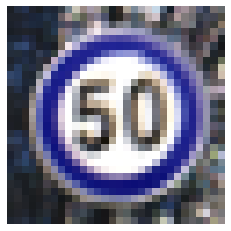

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [41]:
import matplotlib.pyplot as plt

def display_images(images, labels, amount):
    for i in range(amount):
        index = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index])
        plt.show()       
        print("Size of this image is " + str(images[index].shape))
        print("Class of the image is " + str(labels[index]))

print("Train images")
display_images(X_train, Y_train, 3)

In [42]:
# Build Model
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [43]:
# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [44]:
hist = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=32, epochs=15,verbose=1)

Epoch 1/15
857/857 [==============================] - 5s 6ms/step - loss: 1.4956 - accuracy: 0.5757 - val_loss: 0.1993 - val_accuracy: 0.9586
Epoch 2/15
857/857 [==============================] - 5s 5ms/step - loss: 0.2601 - accuracy: 0.9191 - val_loss: 0.0600 - val_accuracy: 0.9846
Epoch 3/15
857/857 [==============================] - 5s 6ms/step - loss: 0.1471 - accuracy: 0.9547 - val_loss: 0.0356 - val_accuracy: 0.9903
Epoch 4/15
857/857 [==============================] - 5s 5ms/step - loss: 0.1041 - accuracy: 0.9671 - val_loss: 0.0341 - val_accuracy: 0.9920
Epoch 5/15
857/857 [==============================] - 5s 6ms/step - loss: 0.0839 - accuracy: 0.9738 - val_loss: 0.0254 - val_accuracy: 0.9940
Epoch 6/15
857/857 [==============================] - 5s 5ms/step - loss: 0.0716 - accuracy: 0.9782 - val_loss: 0.0213 - val_accuracy: 0.9952
Epoch 7/15
857/857 [==============================] - 5s 5ms/step - loss: 0.0634 - accuracy: 0.9807 - val_loss: 0.0202 - val_accuracy: 0.9953
Epoch 

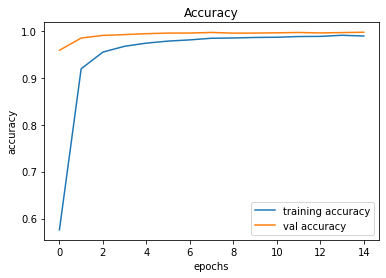

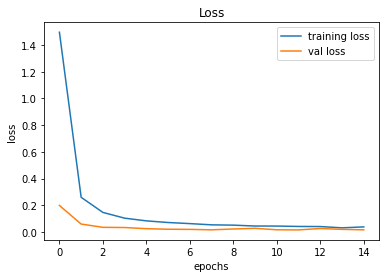

In [46]:
import matplotlib.pyplot as plt
from keras import models

plt.figure(0)
plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [48]:
img = keras.preprocessing.image.load_img("100.png",
                                         color_mode = 'rgb',
                                         target_size=(30,30,3))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)                   # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
result = np.argmax(score)
print(result)   

7


In [56]:
img = keras.preprocessing.image.load_img("stop3.png",
                                         #color_mode = 'rgb',
                                         target_size=(30,30,3))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)                   # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
result = np.argmax(score)
print(result)   

38


In [50]:
model.evaluate(X_train, Y_train)

857/857 [==============================] - 2s 3ms/step - loss: 8.6986e-04 - accuracy: 0.9999


[0.00086985994130373, 0.9998540878295898]

In [18]:
img = cv2.imread('100.png')
print(type(img))
print(img)

<class 'numpy.ndarray'>
[[[51 56 50]
  [47 49 47]
  [48 53 55]
  ...
  [49 55 51]
  [49 54 52]
  [51 55 55]]

 [[55 59 51]
  [50 51 49]
  [51 57 60]
  ...
  [44 51 49]
  [46 51 50]
  [47 52 52]]

 [[58 61 51]
  [54 54 52]
  [50 55 60]
  ...
  [48 56 55]
  [50 55 55]
  [46 53 54]]

 ...

 [[33 33 33]
  [34 35 36]
  [33 35 37]
  ...
  [39 39 39]
  [40 41 42]
  [39 40 42]]

 [[30 30 29]
  [31 31 31]
  [30 32 32]
  ...
  [40 38 38]
  [39 39 40]
  [40 40 42]]

 [[33 33 31]
  [32 33 32]
  [31 33 32]
  ...
  [39 37 38]
  [39 39 41]
  [40 40 43]]]
